# 결정 트리

## 로지스틱 회귀로 와인 분류하기

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [6]:
wine = pd.read_csv('https://bit.ly/wine-date')
wine.head()

# 0=화이트 와인 / 1=레드와인

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [8]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [9]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [10]:
data=wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [12]:
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)
print(train_input.shape, test_input.shape)
#(5197, 3) (1300, 3)

(5197, 3) (1300, 3)


In [14]:
ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
# gini는 불순도 = 기준을 정하는 놈. 루트노드에서 
# gini = 1-(음성클레스비율**2 + 양성클레스비율**2)
# samples = 사용한 샘플의 수
#왼쪽이 음성 레드
# 오른쪽 양성 화이트

In [16]:
lr = LogisticRegression()
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
# 0.7808350971714451
print(lr.score(test_scaled, test_target))
# 0.7776923076923077

0.7808350971714451
0.7776923076923077


## 설명하기 쉬운 모델과 어려운 모델

In [18]:
print(lr.coef_, lr.intercept_)
# [[ 0.51268071  1.67335441 -0.68775646]] [1.81773456]

[[ 0.51268071  1.67335441 -0.68775646]] [1.81773456]


## 결정 트리

In [20]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
# 0.996921300750433
print(dt.score(test_scaled, test_target))
# 0.8592307692307692

0.996921300750433
0.8592307692307692


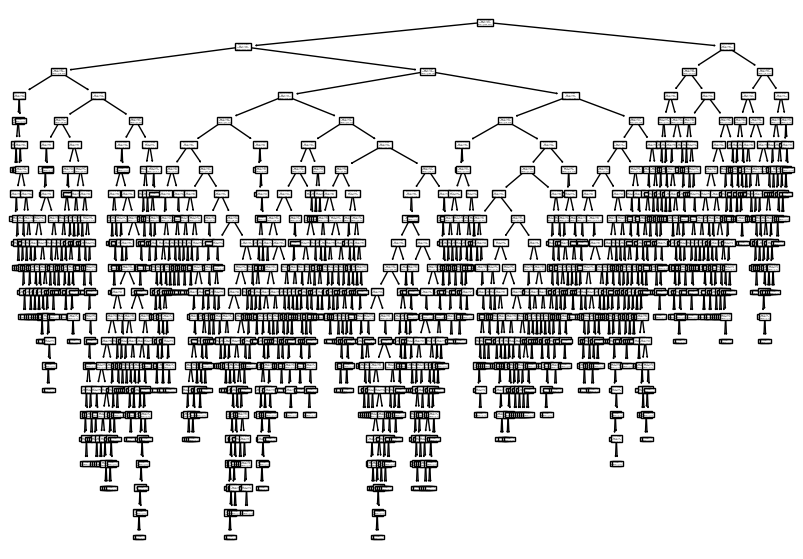

In [39]:
# 의사결정 트리의 구조를 그래픽적으로 보는 코드
plt.figure(figsize=(10,7))
plot_tree(dt)           
plt.show()

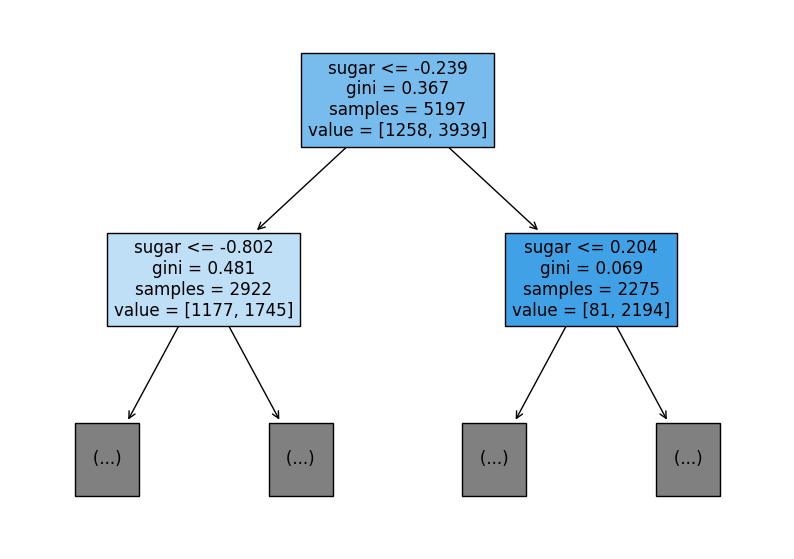

In [22]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
# max_depth = 1 : 트리의 깊이를 1로 제한하여 첫번째 분할만 시각화
# filled = True : 해당 클래스의 주요 클래스로 색칠
# 색상 예시:
    # 클래스 0에 해당하는 노드는 특정 색상(예: 연한 빨간색, 파란색 등)으로 표시되고,
    # 클래스 1에 해당하는 노드는 다른 색상(예: 초록색, 노란색 등)으로 표시됩니다.
# feature_names : 특성(피처) 이름을 지정하는 인자
plt.show()

## 가지치기
- 가지치기(pruning)란?
    - 가지치기는 의사결정 트리에서 과적합을 방지하고 모델을 더 간단하게 만드는 과정
    - 트리는 훈련 데이터에 과도하게 맞춰지면 과적합(overfitting)이 발생할 수 있음

- 가지치기의 주요 목적
    - 과적합 방지
    - 모델 단순화

- 가지치기의 종류
    - 사전 가지치기(Pre-pruning) : max_depth 설정으로 트리를 만들때부터 성장에 제한 두기
    - 후처리 가지치기(Post-pruning) : 트리를 먼저 깊게 생성한 뒤 생성한 뒤에서 가지를 자르는 방법

In [24]:
# max_depth를 조절하여 결정계수 값 확인하기
dt=DecisionTreeClassifier(max_depth=1, random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
# 0.8454877814123533
print(dt.score(test_scaled, test_target))
# 0.8415384615384616

0.7579372715027901
0.7376923076923076


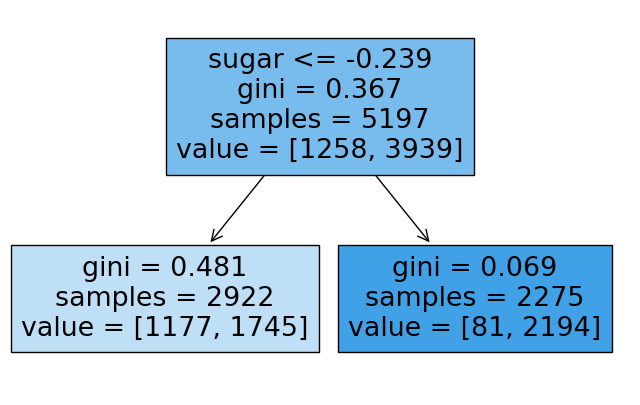

In [28]:
plt.figure(figsize=(8,5))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [30]:
# max_depth를 조절하여 결정 계수 확인하기(max_depth=3)
dt=DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
# 0.8454877814123533
print(dt.score(test_input, test_target))
# 0.8415384615384616

0.8454877814123533
0.8415384615384616


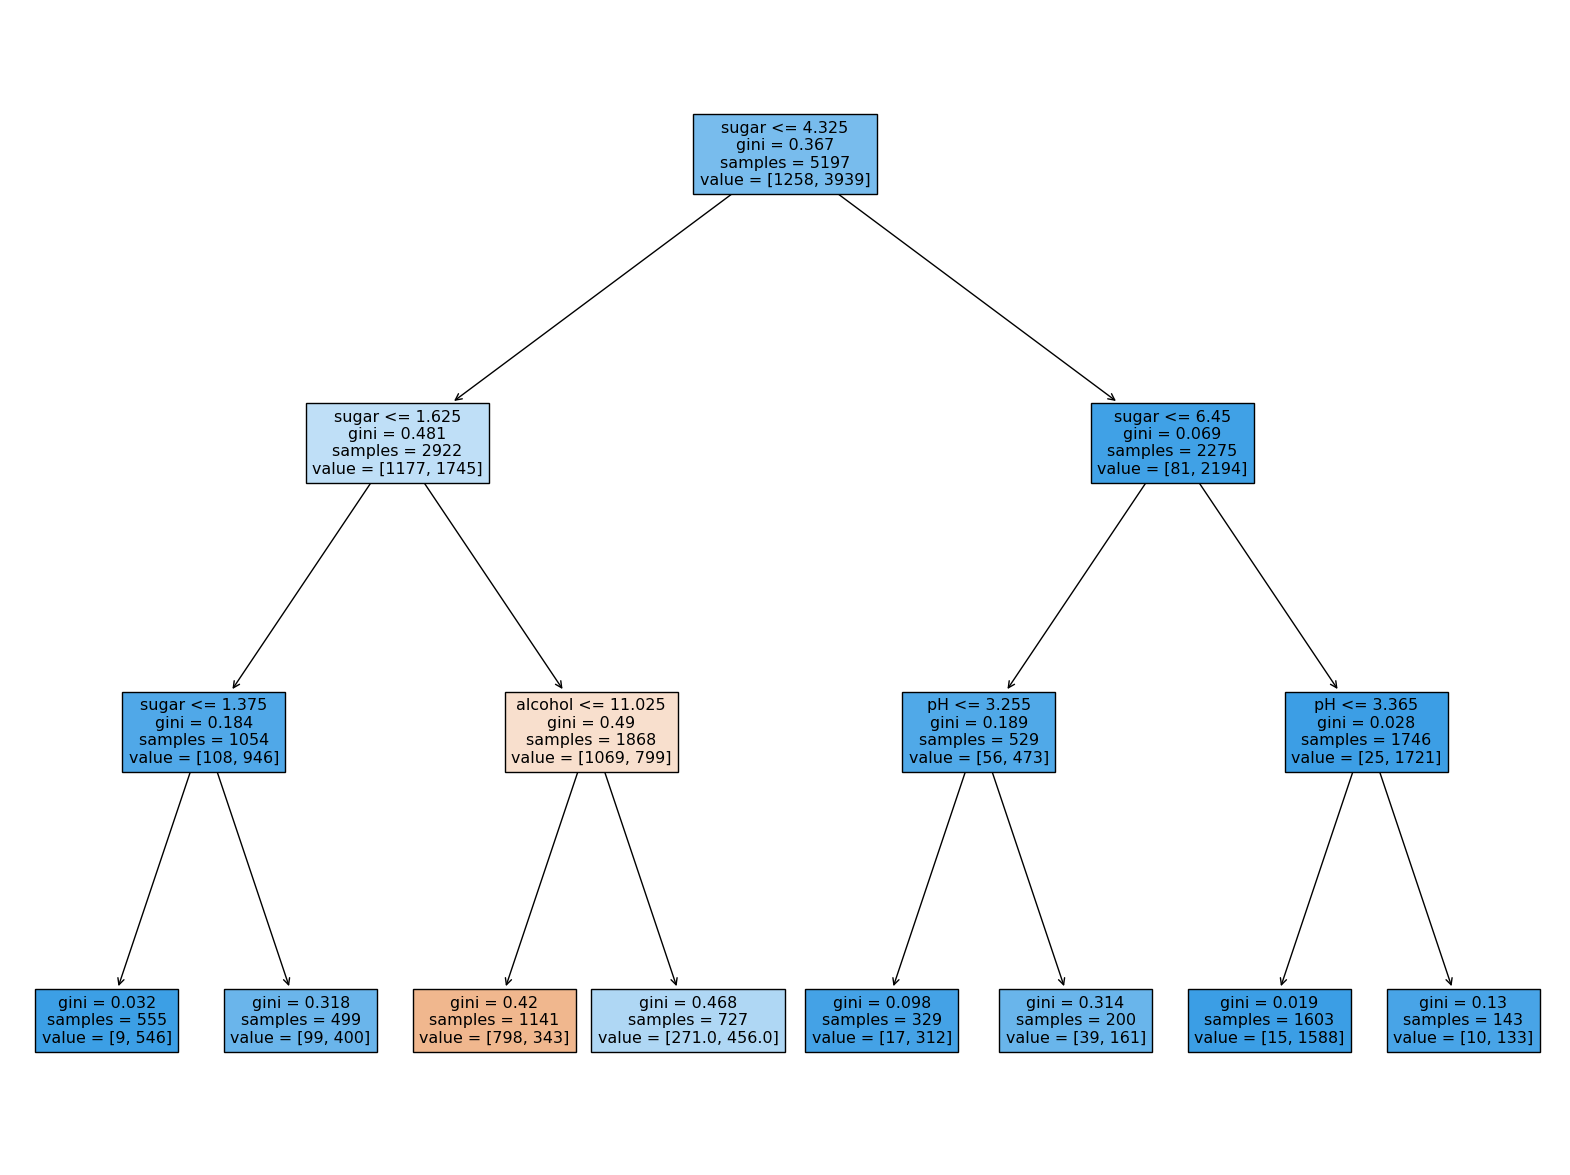

In [32]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [34]:
# 특성 중요도를 출력하는 코드
print(dt.feature_importances_)
# 각 특성의 중요도를 배열 형태로 제공.
# 합은 1로 정규화됨 -> 상대적인 중요도를 볼 수 있음
# [0.12345626 0.86862934 0.0079144 ]

[0.12345626 0.86862934 0.0079144 ]


## 확인문제

In [61]:
# min_impurity_decrease=0.0005 : 불순도 감소 최소값을 설정
# 노드를 분할할 때 불순도가 얼마나 감소해야 분할이 이루어질지를 지정
# 이 값은 분할을 할 때마다 불순도가 0.0005 이상 감소해야만 해당 분할을 진행하도록 만듭니다.
dt=DecisionTreeClassifier(min_impurity_decrease=0.0005, random_state=42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
# 0.8874350586877044
print(dt.score(test_input, test_target))
# 0.8615384615384616

0.8874350586877044
0.8615384615384616


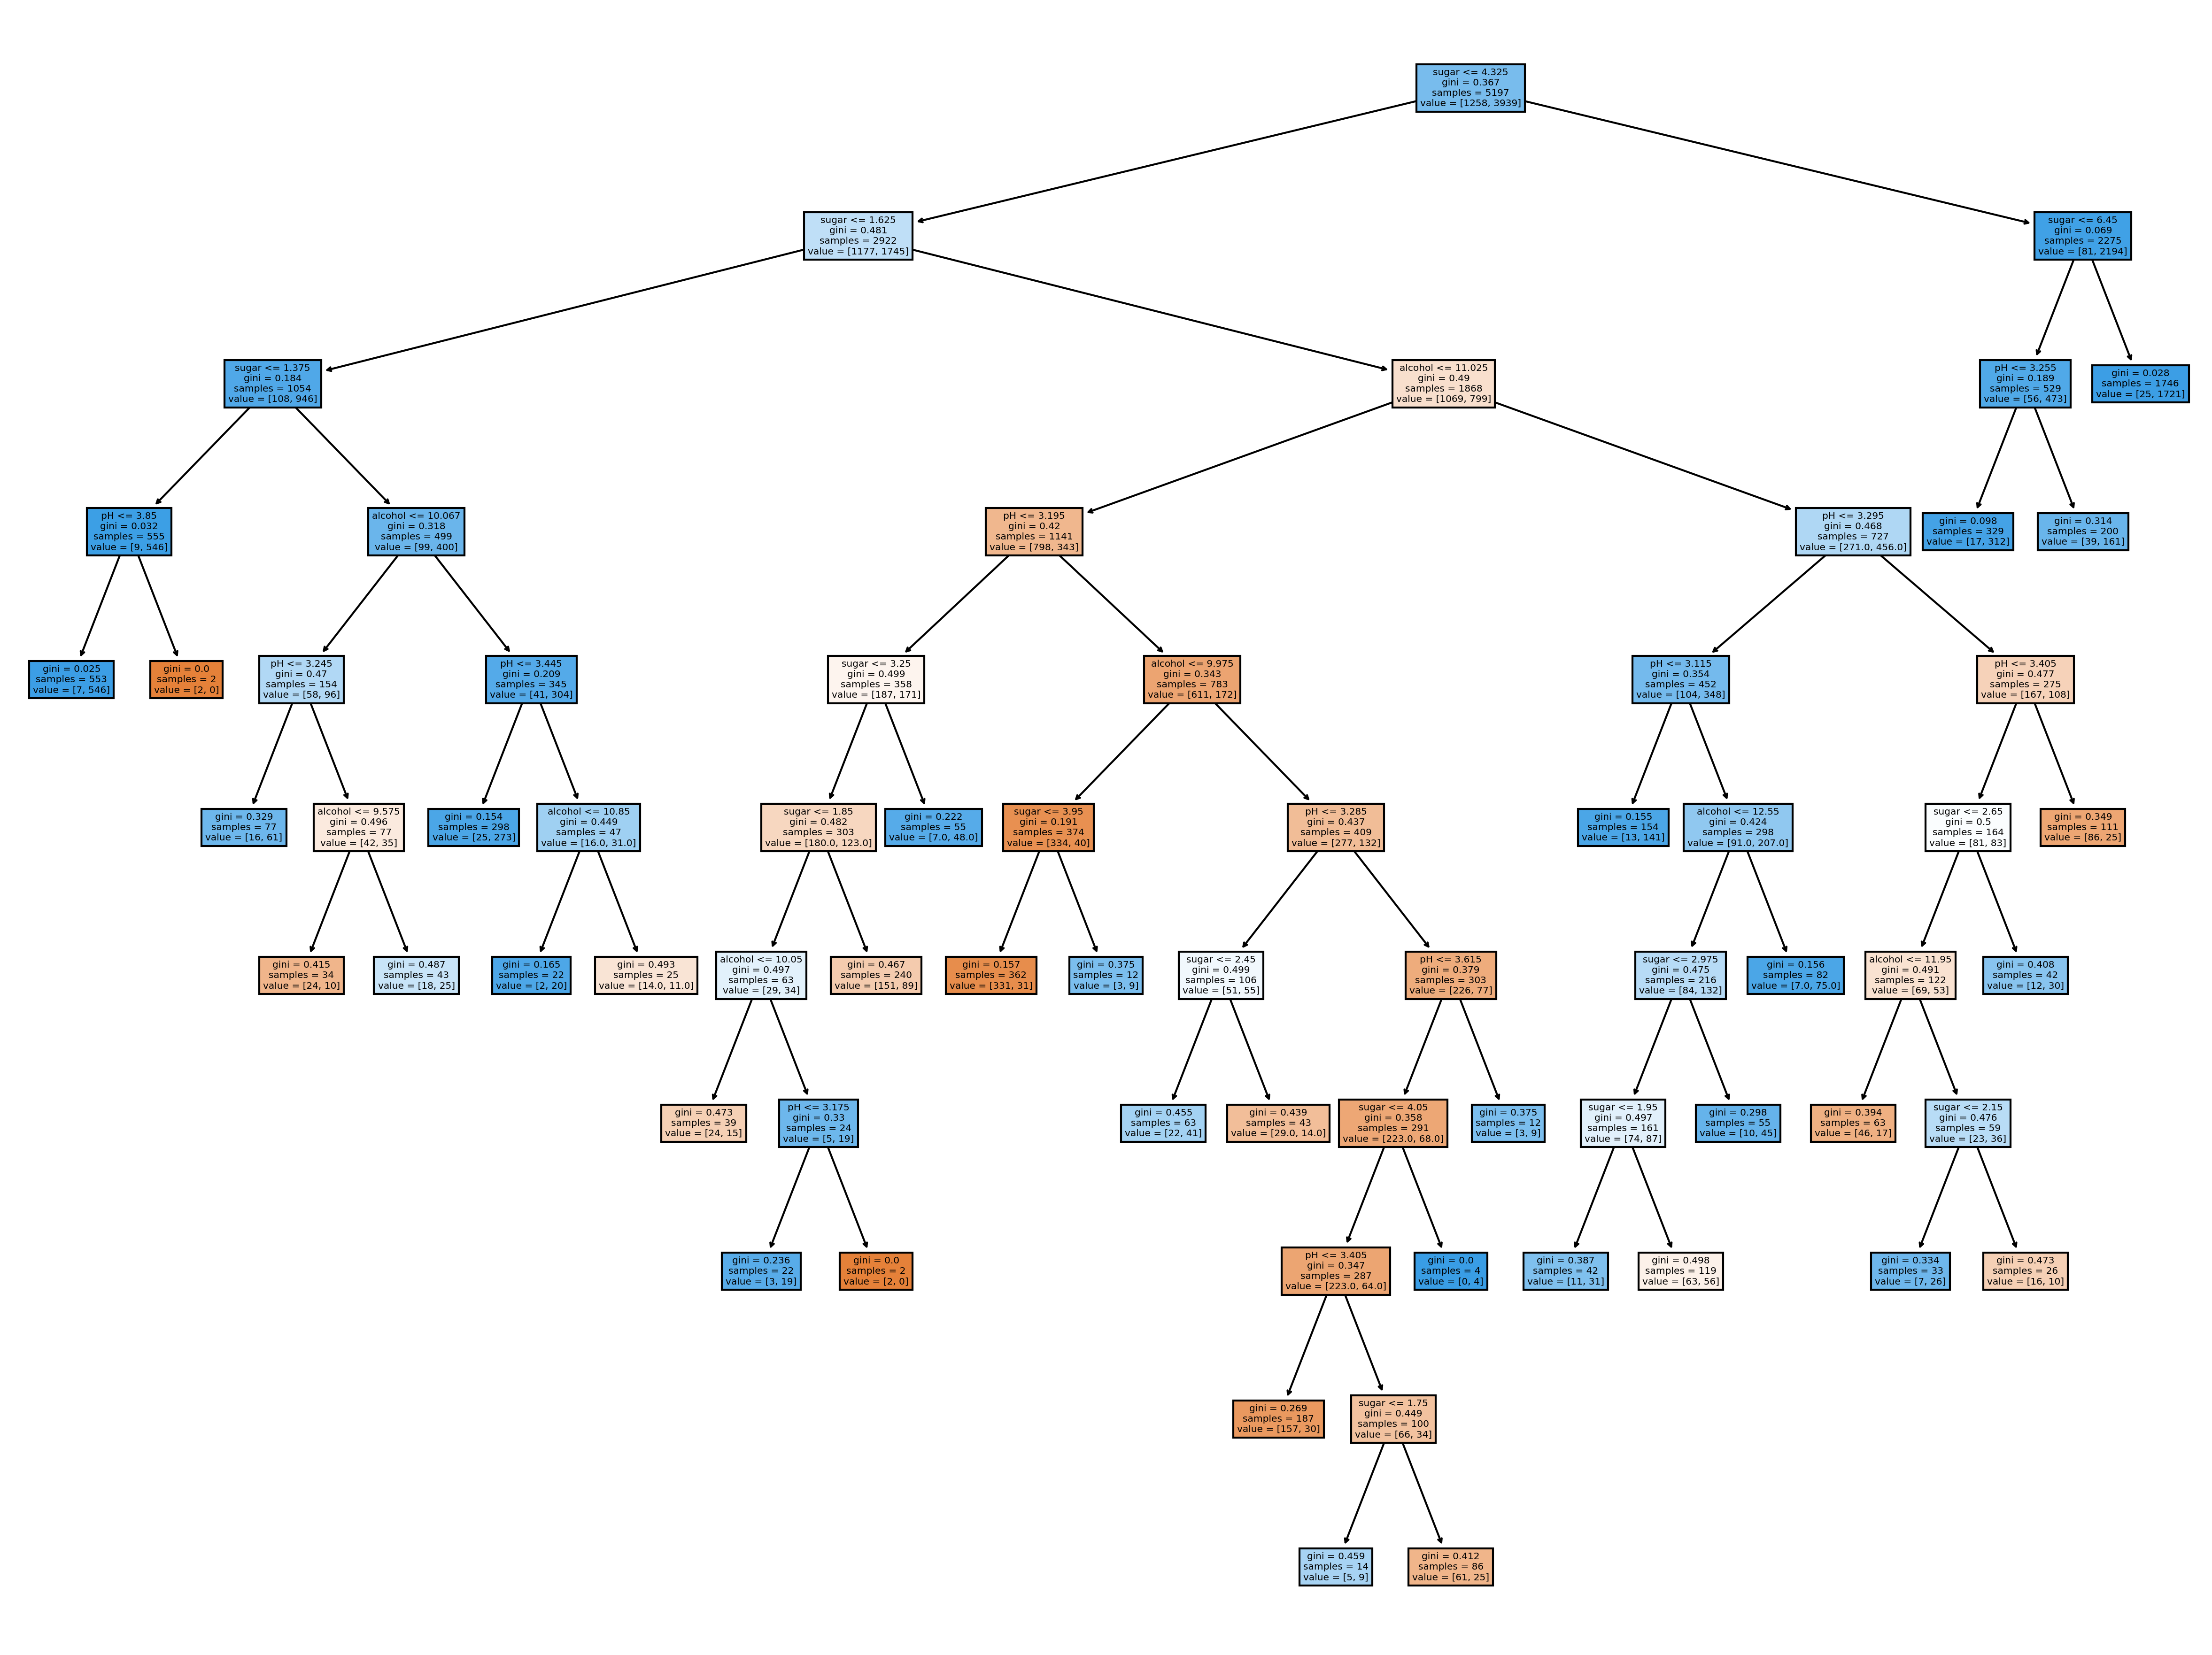

In [63]:
plt.figure(figsize=(20,15), dpi =300)
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()